In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

Consider a tank with volume 300L containing a salt solution. Suppose a solution with 3.5kg/L of salt flows into the tank at a rate of 12L/min. The solution in the tank is well-mixed. Solution flows out of the tank at a rate of 15L/min. If initially there is 20kg of salt in the tank.

Plot two graphs showing the amount of salt in the tank and the concentration of the salt at any time t

$$v(t) = 300 - 3t$$
$$c(t) = \frac{s(t)}{v(t)}$$
$$s(t) = 20 + 42t - 15c(t)$$

In [ ]:
def v(t):
  return 300 - 3 * t

def ds(c):
  return 42 - 15*c

In [ ]:
def odeSolve(T, dt):
    
    steps = int(T//dt)

    S = np.ones(steps +1)
    C = np.ones(steps+1)

    S[0] = 20
    C[0] = 20 / 300

    for step in range(0, steps):
        S[step+1]=S[step]+ds(C[step])*dt
        C[step+1]=S[step+1]/v(step*dt)
        
    return S,C

    

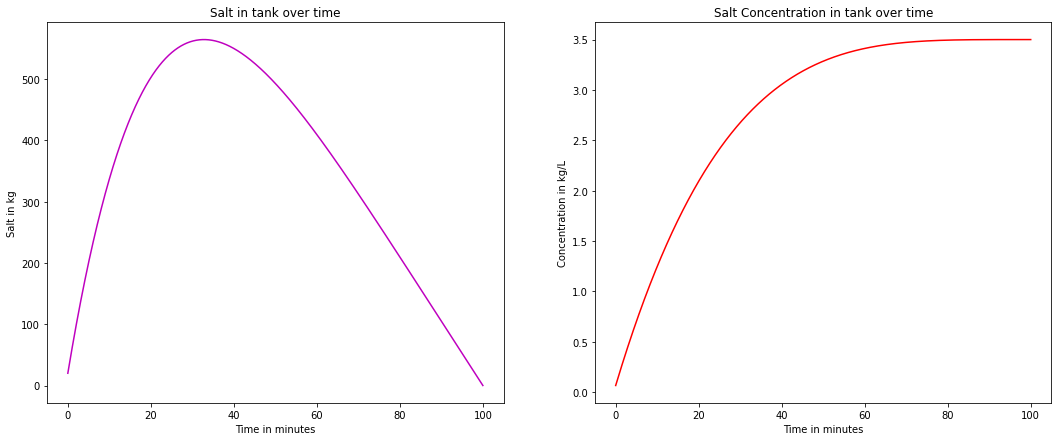

In [ ]:
T = 100
dt = 1e-4
t = np.linspace(0,T, int(T//dt)+1)

S, C = odeSolve(T, dt)

plt.figure(figsize=(18, 7))
plt.subplot(1, 2, 1)
plt.title("Salt in tank over time")
plt.xlabel("Time in minutes")
plt.ylabel("Salt in kg")
plt.plot(t, S, 'm')

plt.subplot(1, 2, 2)
plt.title("Salt Concentration in tank over time")
plt.xlabel("Time in minutes")
plt.ylabel("Concentration in kg/L")
plt.plot(t, C, 'r')


plt.show()

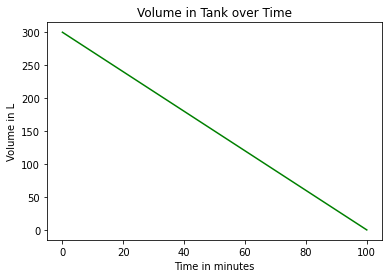

In [ ]:
plt.title("Volume in Tank over Time")
plt.xlabel("Time in minutes")
plt.ylabel("Volume in L")
plt.plot(t, v(t), 'g')

## Question 2

Use the code from this week to plot various solutions illustrating the dynamics of the competing species

$$\frac{dx}{dt} = (1-x-y)x$$
$$\frac{dy}{dt} = \frac{3}{4}(1-\frac{4}{3}y - \frac{2}{3}x)y$$

In [ ]:
def dx(x, y):
  return (1-x-y)*x

def dy(x, y):
  return (3/4)*(1 - (4/3)*y - (2/3)*x)*y

In [ ]:
def odeSolve(T, dt, x0, y0):
    
    steps = int(T//dt)

    X = np.ones(steps+1)
    Y = np.ones(steps+1)

    X[0] = x0
    Y[0] = y0

    for step in range(0, steps):
        X[step+1]=X[step]+dx(X[step],Y[step])*dt
        Y[step+1]=Y[step]+dy(X[step],Y[step])*dt
        
    return X,Y


In [ ]:
T = 30
dt = 1e-4
t = np.linspace(0,T, int(T//dt)+1)

x0, y0 = (np.arange(.1,5,.4), np.arange(.1,5,.4))

XY = [] 

for x in x0:
  for y in y0:
    XY.append(odeSolve(T, dt, x, y))

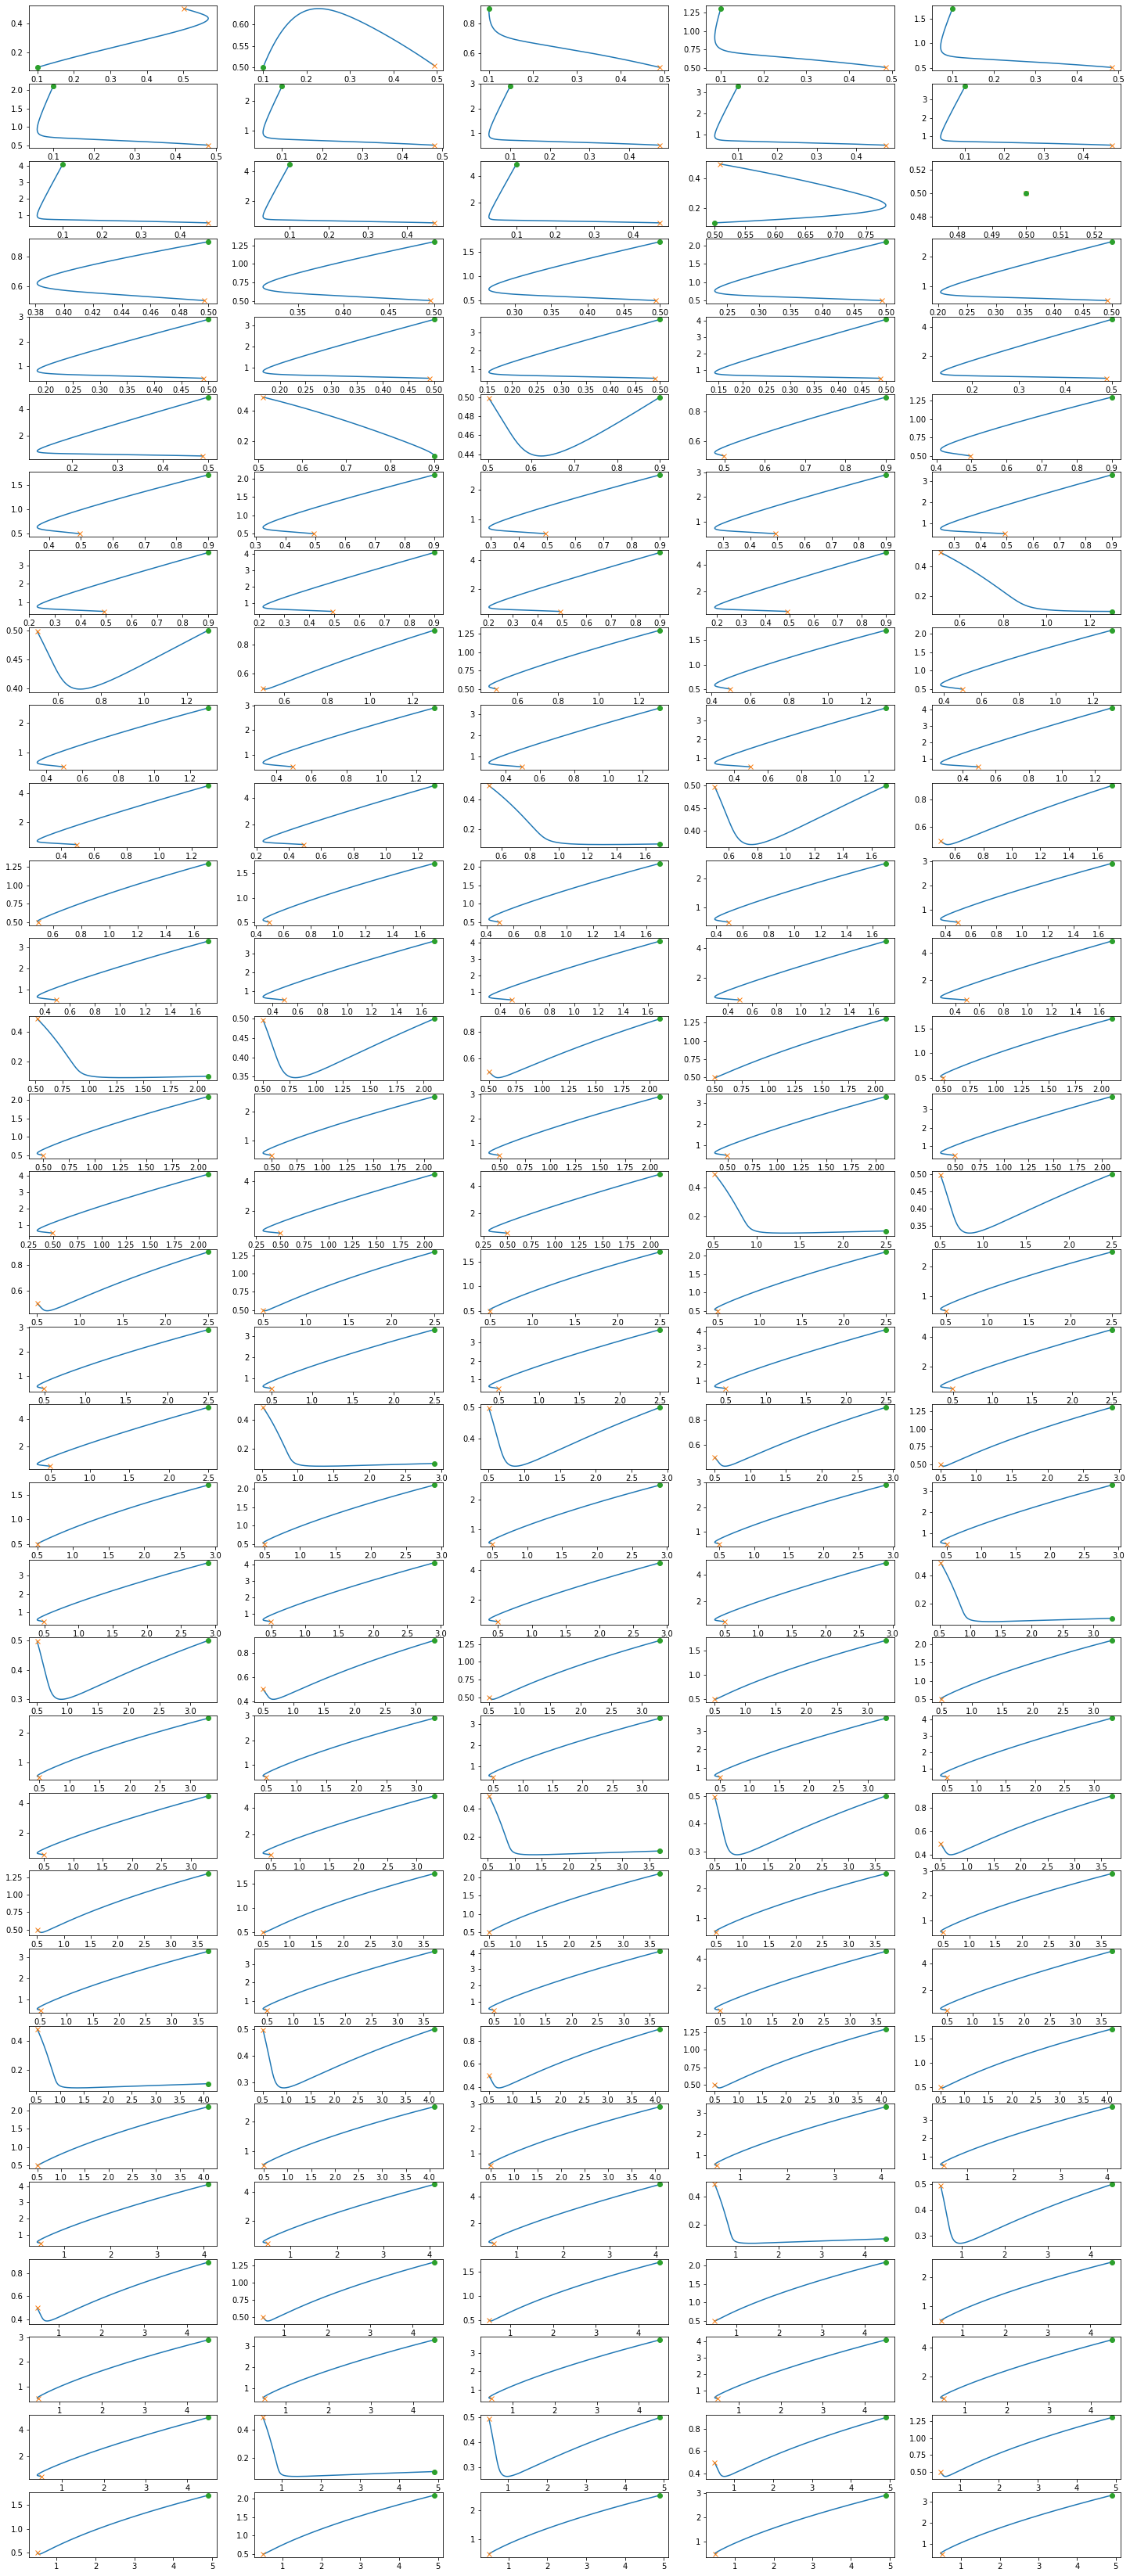

In [ ]:
plt.figure(figsize=(25,60))

for i in range(0,(len(XY)//5)*5):
  plt.subplot((len(XY)//5),5,i+1)
  plt.plot(XY[i][0],XY[i][1])
  plt.plot(XY[i][0][-1],XY[i][1][-1],'x')
  plt.plot(XY[i][0][0],XY[i][1][0],'o')


plt.show()

 ## Question 3

Use the code from this week to plot various solutions illustrating the dynamics of the competing species

$$\frac{dx}{dt} = 2x(1-\frac{x}{2})-xy$$
$$\frac{dy}{dt} = y(\frac{9}{4} - y^2) - x^2y$$

In [ ]:
def dx(x, y):
  return 2*x*(1-(x/2))-x*y

def dy(x, y):
  return y*((9/4)-y**2)-x**2*y

In [ ]:
T = 30
dt = 1e-4
t = np.linspace(0,T, int(T//dt)+1)

x0, y0 = (np.arange(.1,5,.4), np.arange(.1,5,.4))

XY = [] 

for x in x0:
  for y in y0:
    XY.append(odeSolve(T, dt, x, y))

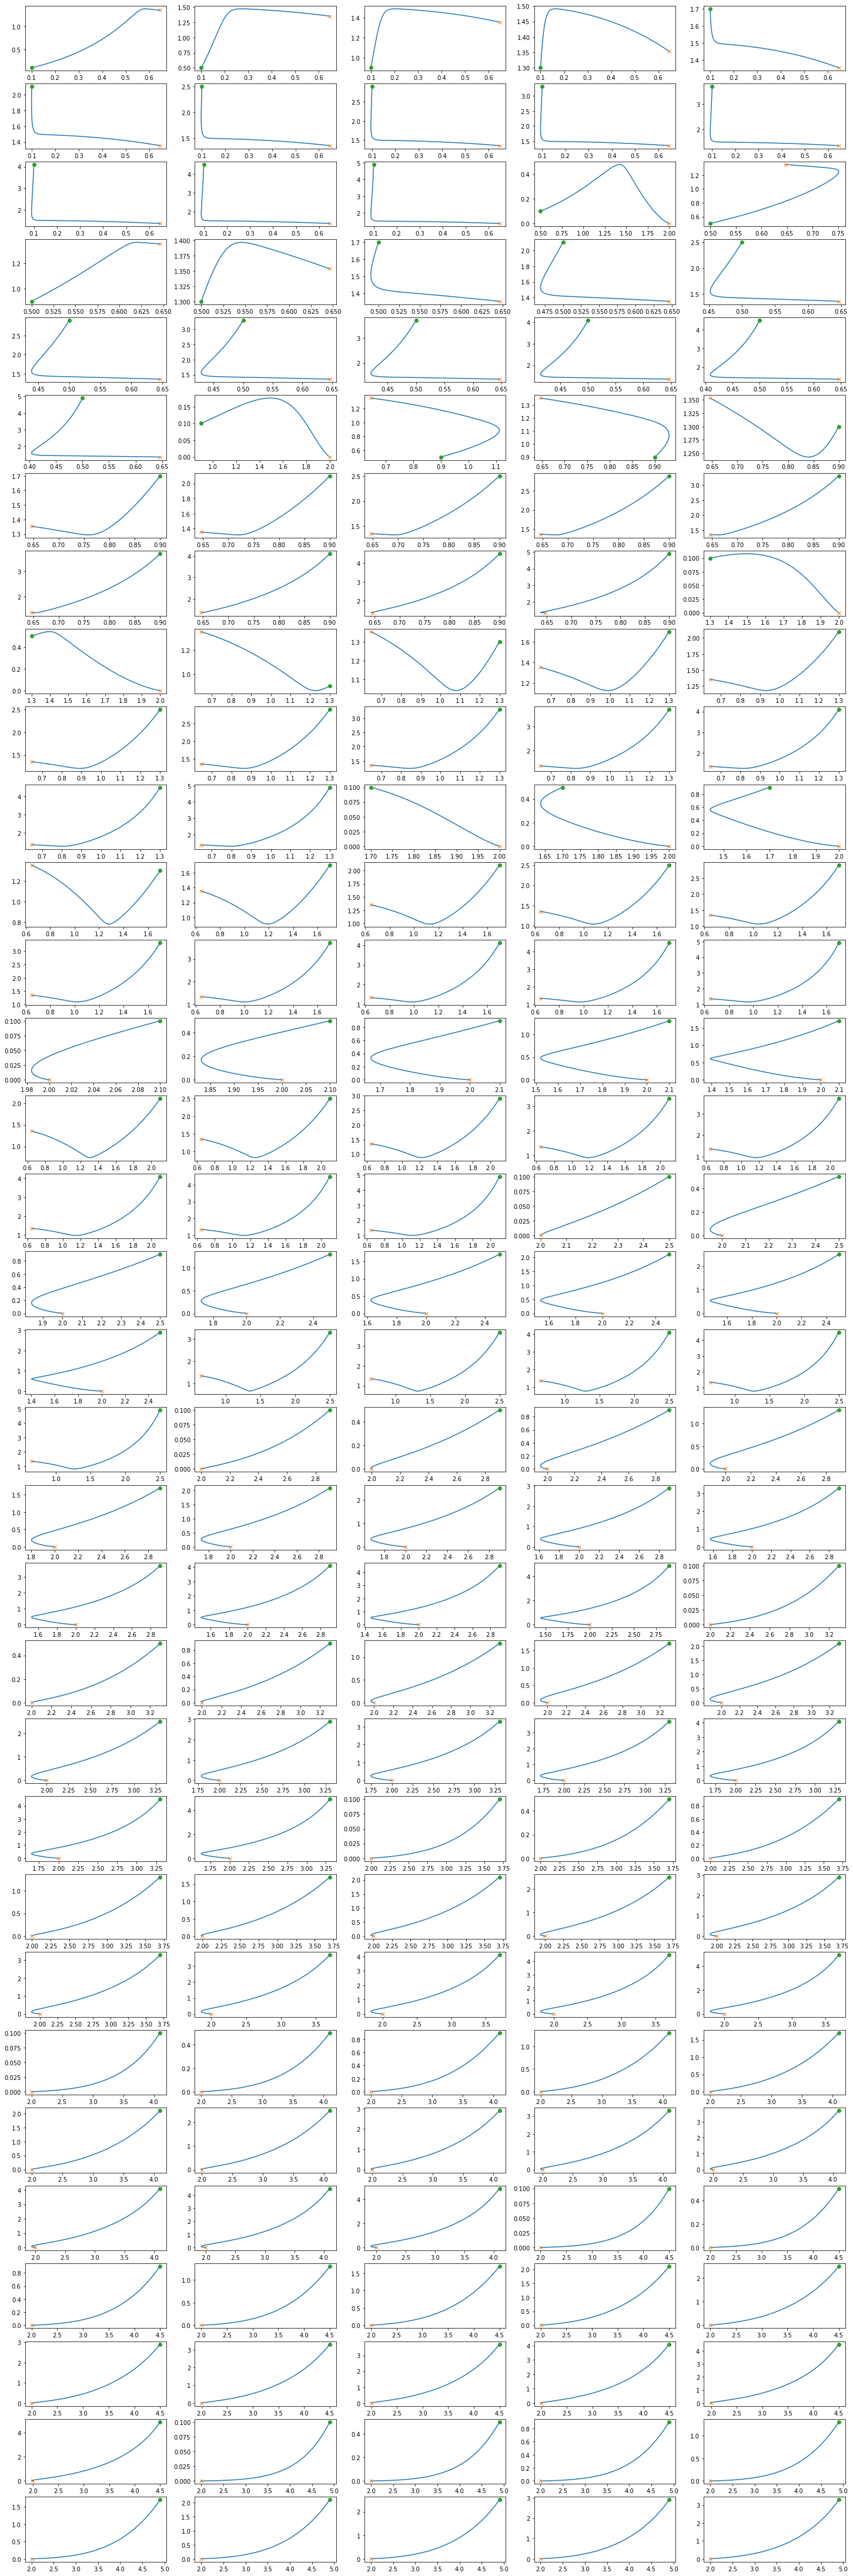

In [ ]:
plt.figure(figsize=(25,80))

for i in range(0,(len(XY)//5)*5):
  plt.subplot((len(XY)//5),5,i+1)
  plt.plot(XY[i][0],XY[i][1])
  plt.plot(XY[i][0][-1],XY[i][1][-1],'x')
  plt.plot(XY[i][0][0],XY[i][1][0],'o')


plt.show()

Never really got a good periodic relationship. Oh well, I plotted a lot of different starting point dynamics!